In [20]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np 
import json

In [31]:
img = cv2.imread('Genova.png')
reader =  easyocr.Reader(['fr', 'it'], gpu=False)
texts = reader.readtext(img)

Using CPU. Note: This module is much faster with a GPU.


In [33]:
def convert_types(item):
    if isinstance(item, np.generic):
        return item.item()
    elif isinstance(item, list):
        return [convert_types(sub_item) for sub_item in item]
    else:
        return item

json_list = []
for item in texts:
    data_dict = {
        "coordinates": convert_types(item[0]),
        "label": item[1],
        "score": convert_types(item[2])
    }
    json_list.append(data_dict)


json_data = json.dumps(json_list, indent=2)

with open("results.json", 'w') as json_file:
    json.dump(json_list, json_file, indent=2)

In [3]:
for i in texts:
    print(i)

([[65, 53], [97, 53], [97, 67], [65, 67]], '6p35', 0.6043820381164551)
([[593, 157], [653, 157], [653, 173], [593, 173]], 'Camaldoli', 0.9999356259476269)
([[284, 218], [360, 218], [360, 248], [284, 248]], 'Gênes', 0.999955857536583)
([[234, 320], [269, 320], [269, 334], [234, 334]], 'Bacino', 0.9200931855910524)
([[240, 334], [264, 334], [264, 340], [240, 340]], 'Pagc', 0.010365644469857216)
([[232, 340], [271, 340], [271, 354], [232, 354]], 'Vaccho', 0.6177179671939338)


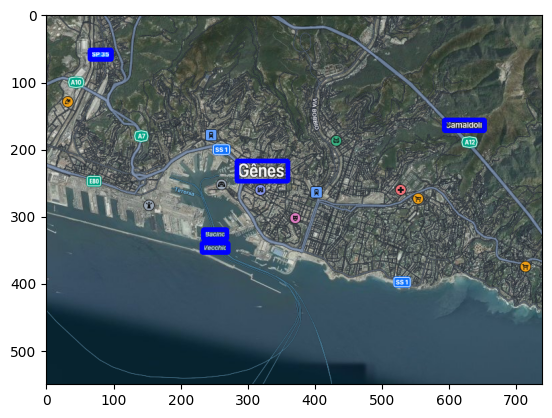

In [3]:
for i in texts:
    bbox, text, score = i

    cv2.rectangle(img ,bbox[0], bbox[2], (255,0,0), 5)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(block=False)

In [4]:
import pytesseract


custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'Presa): 5 ee, ee ee\nOSs fen ty\nSak [-s. PO Ne eer\ni? Ee se ot Ci wan,\n- PES Bee Sto BURP SNS Mags\n\n6/7 Gane Ne FSS 4\nBlk RA Ries\nUS) aes BSNS ges Ba eal ane 4\nCy Maer pen ee BA [aes a ee 4 !\nLai) Eat Gy eae Sao ee a Hee AN\nGet (ees eS ee ee Wey\nSe Ce URS G PEM ag 12 aes\nEE ge RN Bice GE Pee Nake ca (a fab\nee Seg a Gites Pe ee Ne ey\niy 2 SC OE ae:\na (oe Nan oe cat NG ne\n= a Se id nae OR He\n; _ Ray ee\n- CS ibs ge ce US Reena iy e:\nwcent one By eet, Joa 7 N\nem A ed eee\n: = Nis re Bole a\nyg EEE Soe rs\n= i OU\ni eae\n\nyy,\n\nS y,\n\nNS a.\n\nf ff\n'

In [14]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [15]:
img = cv2.imread('Genova.png')

gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [19]:
for i in [img,gray,thresh,opening,canny]:
    texts = reader.readtext(i)
    for j in texts:
        print(j)
    print('*****')

([[65, 53], [97, 53], [97, 67], [65, 67]], '6p35', 0.6043820381164551)
([[593, 157], [653, 157], [653, 173], [593, 173]], 'Camaldoli', 0.9999356259476269)
([[284, 218], [360, 218], [360, 248], [284, 248]], 'Gênes', 0.999955857536583)
([[234, 320], [269, 320], [269, 334], [234, 334]], 'Bacino', 0.9200931855910524)
([[240, 334], [264, 334], [264, 340], [240, 340]], 'Pagc', 0.010365644469857216)
([[232, 340], [271, 340], [271, 354], [232, 354]], 'Vaccho', 0.6177179671939338)
*****
([[593, 157], [653, 157], [653, 173], [593, 173]], 'Camaldoli', 0.9999356259476269)
([[284, 218], [360, 218], [360, 248], [284, 248]], 'Gênes', 0.999955857536583)
([[234, 320], [269, 320], [269, 334], [234, 334]], 'Bacino', 0.9200931855910524)
([[240, 334], [264, 334], [264, 340], [240, 340]], 'Pagc', 0.010365644469857216)
([[232, 340], [271, 340], [271, 354], [232, 354]], 'Vaccho', 0.6177179671939338)
*****
([[235, 321], [271, 321], [271, 335], [235, 335]], 'Encto', 0.039650298040962415)
([[238, 334], [264, 334

In [ ]:
def erode_vertical_lines(self):
    hor = np.array([[1,1,1,1,1,1]])
    self.vertical_lines_eroded_image = cv2.erode(self.inverted_image, hor, iterations=10)
    self.vertical_lines_eroded_image = cv2.dilate(self.vertical_lines_eroded_image, hor, iterations=10)

def erode_horizontal_lines(self):
    ver = np.array([[1],
            [1],
            [1],
            [1],
            [1],
            [1],
            [1]])
    self.horizontal_lines_eroded_image = cv2.erode(self.inverted_image, ver, iterations=10)
    self.horizontal_lines_eroded_image = cv2.dilate(self.horizontal_lines_eroded_image, ver, iterations=10)


def combine_eroded_images(self):
    self.combined_image = cv2.add(self.vertical_lines_eroded_image, self.horizontal_lines_eroded_image)


def dilate_combined_image_to_make_lines_thicker(self):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    self.combined_image_dilated = cv2.dilate(self.combined_image, kernel, iterations=5)


def subtract_combined_and_dilated_image_from_original_image(self):
    self.image_without_lines = cv2.subtract(self.inverted_image, self.combined_image_dilated)


def remove_noise_with_erode_and_dilate(self):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    self.image_without_lines_noise_removed = cv2.erode(self.image_without_lines, kernel, iterations=1)
    self.image_without_lines_noise_removed = cv2.dilate(self.image_without_lines_noise_removed, kernel, iterations=1)


def dilate_image(self):
    kernel_to_remove_gaps_between_words = np.array([
            [1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1]
    ])
    self.dilated_image = cv2.dilate(self.thresholded_image, kernel_to_remove_gaps_between_words, iterations=5)
    simple_kernel = np.ones((5,5), np.uint8)
    self.dilated_image = cv2.dilate(self.dilated_image, simple_kernel, iterations=2)


def find_contours(self):
    result = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    self.contours = result[0]
    # The code below is for visualization purposes only.
    # It is not necessary for the OCR to work.
    self.image_with_contours_drawn = self.original_image.copy()
    cv2.drawContours(self.image_with_contours_drawn, self.contours, -1, (0, 255, 0), 3)


def convert_contours_to_bounding_boxes(self):
    self.bounding_boxes = []
    self.image_with_all_bounding_boxes = self.original_image.copy()
    for contour in self.contours:
        x, y, w, h = cv2.boundingRect(contour)
        self.bounding_boxes.append((x, y, w, h))
        # This line below is about
        # drawing a rectangle on the image with the shape of
        # the bounding box. Its not needed for the OCR.
        # Its just added for debugging purposes.
        self.image_with_all_bounding_boxes = cv2.rectangle(self.image_with_all_bounding_boxes, (x, y), (x + w, y + h), (0, 255, 0), 5)


def get_mean_height_of_bounding_boxes(self):
    heights = []
    for bounding_box in self.bounding_boxes:
        x, y, w, h = bounding_box
        heights.append(h)
    return np.mean(heights)

def sort_bounding_boxes_by_y_coordinate(self):
    self.bounding_boxes = sorted(self.bounding_boxes, key=lambda x: x[1])

def club_all_bounding_boxes_by_similar_y_coordinates_into_rows(self):
    self.rows = []
    half_of_mean_height = self.mean_height / 2
    current_row = [ self.bounding_boxes[0] ]
    for bounding_box in self.bounding_boxes[1:]:
        current_bounding_box_y = bounding_box[1]
        previous_bounding_box_y = current_row[-1][1]
        distance_between_bounding_boxes = abs(current_bounding_box_y - previous_bounding_box_y)
        if distance_between_bounding_boxes <= half_of_mean_height:
            current_row.append(bounding_box)
        else:
            self.rows.append(current_row)
            current_row = [ bounding_box ]
    self.rows.append(current_row)

def sort_all_rows_by_x_coordinate(self):
    for row in self.rows:
        row.sort(key=lambda x: x[0])


def crop_each_bounding_box_and_ocr(self):
    self.table = []
    current_row = []
    image_number = 0
    for row in self.rows:
        for bounding_box in row:
            x, y, w, h = bounding_box
            y = y - 5
            cropped_image = self.original_image[y:y+h, x:x+w]
            image_slice_path = "./ocr_slices/img_" + str(image_number) + ".jpg"
            cv2.imwrite(image_slice_path, cropped_image)
            results_from_ocr = self.get_result_from_tersseract(image_slice_path)
            current_row.append(results_from_ocr)
            image_number += 1
        self.table.append(current_row)
        current_row = []

def get_result_from_tersseract(self, image_path):
    output = subprocess.getoutput('tesseract ' + image_path + ' - -l eng --oem 3 --psm 7 --dpi 72 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789().calmg* "')
    output = output.strip()
    return output


def generate_csv_file(self):
    with open("output.csv", "w") as f:
        for row in self.table:
            f.write(",".join(row) + "\n")

# Pour aller plus loin

Utilisation d'une base de données contenant des noms de lieux pour trouver des similitudes 

Utilisation d'un modèle de LLM pour retrouver les résultats éronnés